# Imports

In [47]:
import pandas as pd
from igraph import *
import numpy as np

In [4]:
scouts = pd.read_csv('scouts.csv',low_memory=False)

In [5]:
users = pd.read_csv('users_and_mean_rating.csv',low_memory=False)

In [20]:
reviews = pd.read_csv('reviews.csv',low_memory=False) 

# Selection des utilisateurs

In [220]:
mini =19
maxi =20

In [221]:
users_chosen = users.loc[users['nb_critiques']>mini]
users_chosen =  users_chosen.loc[users_chosen['nb_critiques']<=maxi]
users_chosen 

,Unnamed: 0,user_id,nb_eclaireurs,nb_suiveurs,nb_critiques,nb_notes,moyenne_notes
16527,16527,44745,12,10,20,20.0,5.800000
16528,16528,44759,0,2,20,20.0,7.250000
16534,16534,50579,7,9,20,20.0,7.250000
16585,16585,109521,0,0,20,19.0,2.842105
16594,16594,129953,0,0,20,20.0,6.000000
...,...,...,...,...,...,...,...
67674,67674,68561,23,23,20,2277.0,7.239350
67721,67721,790306,55,51,20,4317.0,7.223767
67772,67772,283907,499,81,20,1727.0,7.316155
67828,67828,472027,88,49,20,2090.0,6.353110


In [170]:
user_id       = users_chosen['user_id'].tolist()
nb_eclaireurs = users_chosen['nb_eclaireurs'].tolist()
nb_suiveurs   = users_chosen['nb_suiveurs'].tolist()
nb_critiques  = users_chosen['nb_critiques'].tolist()
nb_notes      = users_chosen['nb_notes'].tolist()
moyenne_notes = users_chosen['moyenne_notes'].tolist()
n = len(user_id)

In [171]:
n

364

# Création du graphe Liens

In [11]:
g = Graph() 
g=g.as_directed()

Placement des noeuds

In [12]:
g.add_vertices(n)

In [13]:
g.vs["user_id"]       = user_id
g.vs["nb_eclaireurs"] = nb_eclaireurs
g.vs["nb_suiveurs"]   = nb_suiveurs
g.vs["nb_critiques"]  = nb_critiques
g.vs["nb_notes"]      = nb_notes
g.vs["moyenne_notes"] = moyenne_notes

Placement des arrêtes Liens

In [16]:
for user in user_id:
    sc=scouts.loc[scouts['user_id']==user]['user_id_scout'].tolist()
    for j in range(len(sc)):
        if sc[j] in user_id:
            g.add_edges([(user_id.index(user),user_id.index(sc[j]))])
           

Affichage du graphe

In [ ]:
layout = g.layout("kk")
#g = g.as_directed()
plot(g, layout = layout)

In [18]:
g.save("graph_top.gml")

# Création du graphe produits en communs

In [203]:
g = Graph() 

Placement des noeuds

In [204]:
g.add_vertices(n)

In [205]:
g.vs["user_id"]       = user_id
g.vs["nb_eclaireurs"] = nb_eclaireurs
g.vs["nb_suiveurs"]   = nb_suiveurs
g.vs["nb_critiques"]  = nb_critiques
g.vs["nb_notes"]      = nb_notes
g.vs["moyenne_notes"] = moyenne_notes
g.es["produits_communs"] = []

Recuperation de la liste de critiques de chaque utilisateurs

In [172]:
a=[]
for user in user_id:
    a.append(reviews.loc[reviews['user_id']==user]['product_id'].tolist())

364

Determination des critiques en commun

In [217]:
edges=np.zeros((n,n))
b=a.copy()
for c in a:
    i=0
    j=0
    b.remove(c)
    for d in b:
        for l in range(len(c)):
            for m in range(len(d)):
                if (c[l] == d[m]):
                    edges[a.index(c),a.index(d)]+=1

Placement des arrêtes nb de produits en commun

In [213]:
index=[k for k in range(n)]
for i in range(n):
    for j in index :
        if edges[i,j]!=0:
            g.add_edges([(i,j)])
            g.es["produits_communs"].append(vertex[i,j])
        

Affichage du graphe

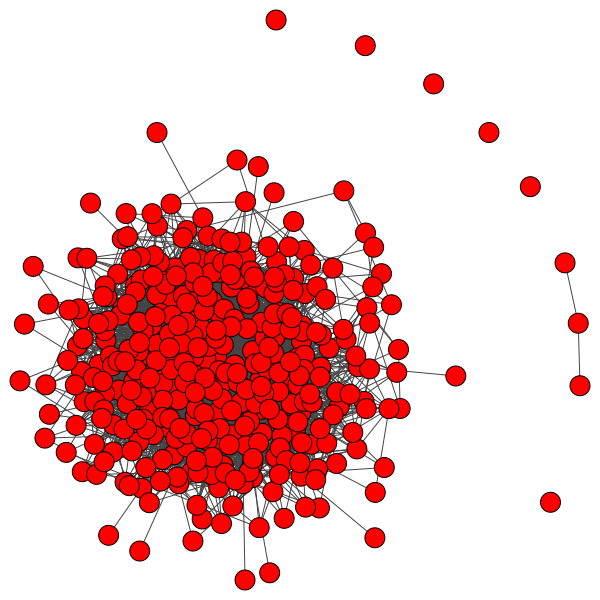

In [214]:
layout = g.layout("kk")
plot(g, layout = layout)

In [190]:
g.save("graph_produits_communs_20.gml")

C:\ProgramData\Anaconda3\lib\site-packages\igraph\__init__.py:2280: RuntimeWarning: A boolean edge attribute was converted to numeric at d:\build\igraph\igraph-vtraag\igraph-0.7.1+5.3b99dbf6-msvc\src\foreign.c:2690
  return writer(f, *args, **kwds)
